In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from  sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
Score = [[1,2,3,4],[1,2,3,4],[1,2,3,4],[1,2,3,4]]

In [2]:
data = pd.read_csv(r"E:\machine courses\deep learning edureka\churn.csv.txt")# load dataset 

In [3]:
#show first five rows of dataset
data.head(3)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.


In [4]:
#checking number or rows and columns of data set
data.shape

(3333, 21)

In [5]:
#replacing space to # in between column name
data.columns = [s.replace(" ","_") for s in data.columns]

In [6]:
# drop phone number column 
data=data.drop(['Phone'],axis=1)


In [7]:
data.head(3) # show first three rows of dataset

,State,Account_Length,Area_Code,Int'l_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn?
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.


In [8]:
data.isnull().sum() # checking is there any null value in dataset or not

State             0
Account_Length    0
Area_Code         0
Int'l_Plan        0
VMail_Plan        0
VMail_Message     0
Day_Mins          0
Day_Calls         0
Day_Charge        0
Eve_Mins          0
Eve_Calls         0
Eve_Charge        0
Night_Mins        0
Night_Calls       0
Night_Charge      0
Intl_Mins         0
Intl_Calls        0
Intl_Charge       0
CustServ_Calls    0
Churn?            0
dtype: int64

In [9]:
data.describe() # getting all statiscal of column numerical of dataset

,Account_Length,Area_Code,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [10]:
data.info() # getting information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State             3333 non-null object
Account_Length    3333 non-null int64
Area_Code         3333 non-null int64
Int'l_Plan        3333 non-null object
VMail_Plan        3333 non-null object
VMail_Message     3333 non-null int64
Day_Mins          3333 non-null float64
Day_Calls         3333 non-null int64
Day_Charge        3333 non-null float64
Eve_Mins          3333 non-null float64
Eve_Calls         3333 non-null int64
Eve_Charge        3333 non-null float64
Night_Mins        3333 non-null float64
Night_Calls       3333 non-null int64
Night_Charge      3333 non-null float64
Intl_Mins         3333 non-null float64
Intl_Calls        3333 non-null int64
Intl_Charge       3333 non-null float64
CustServ_Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(8), object(4)
memory usage: 520.9+ KB


In [11]:
#showing total count of different data types total count
print(data.dtypes.value_counts())

int64      8
float64    8
object     4
dtype: int64


# Count of Churn Plot

Text(0.5, 1.0, 'Count of Churn')

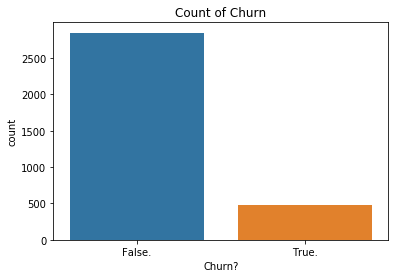

In [12]:
sns.countplot(x='Churn?',data=data)
plt.title('Count of Churn')

# Total Count Of Different State

Text(0.5, 1.0, ' Total Count Of Different State')

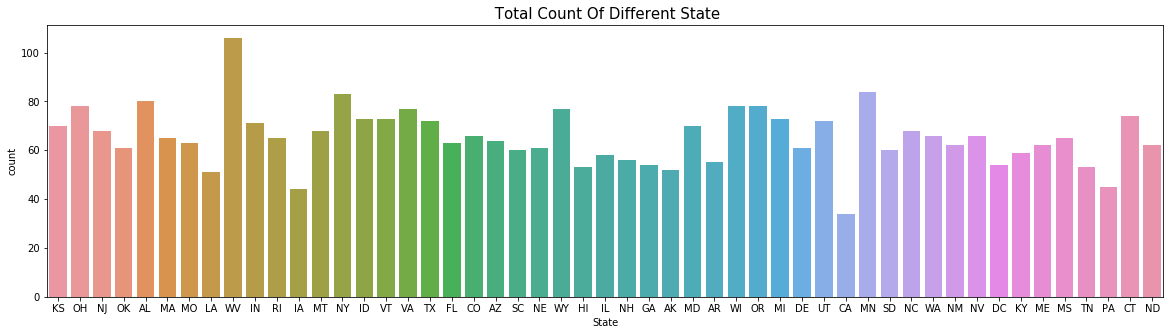

In [13]:

plt.figure(figsize=(20,5))
sns.countplot('State',data=data)

plt.title(' Total Count Of Different State',fontsize=15)

# Count Comparision Between All States Are Churn Or Not

Text(0.5, 1.0, 'Count Comparision Between All States Are Churn Or Not')

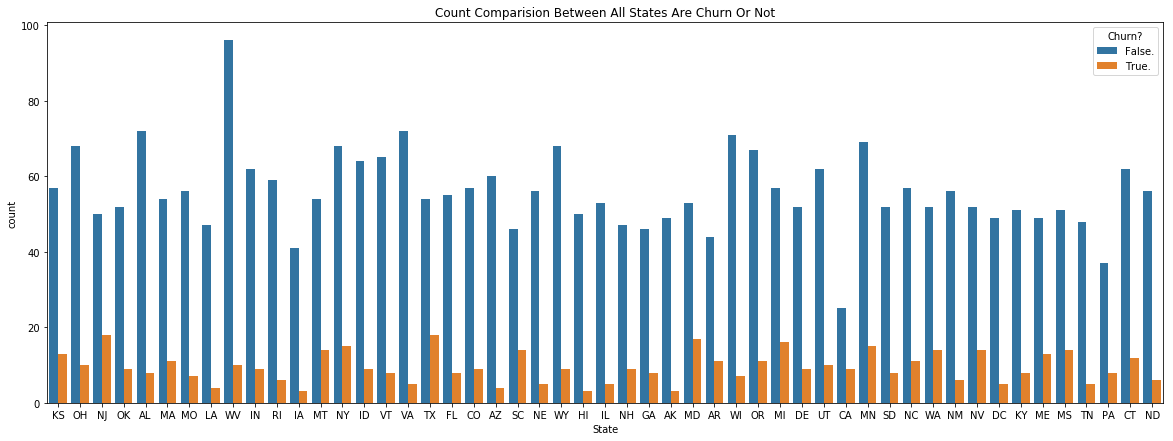

In [14]:
plt.figure(figsize=(20,7))
sns.countplot('State',data=data,hue='Churn?',dodge=True)
plt.title('Count Comparision Between All States Are Churn Or Not')

# Count Comparision Between Customer Have Or Not (VMail Plan And Int'l_Plan) Are Churn Or Not

Text(0.5, 1.0, "Count Comparision Between Customer Have Or Not (VMail Plan And Int'l_Plan) Are Churn Or Not")

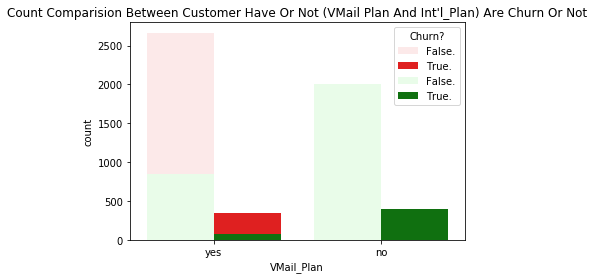

In [15]:
sns.countplot(x="Int'l_Plan",hue='Churn?',data=data,dodge=True,color='r')
sns.countplot(x='VMail_Plan',hue='Churn?',data=data,dodge=True,color='g')
plt.title("Count Comparision Between Customer Have Or Not (VMail Plan And Int'l_Plan) Are Churn Or Not")

In [16]:
#converting state column data categorie to lablel encoding and then hotencoder
cate = [key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['bool', 'object']]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cate:
    le.fit(data[i])
    data[i]=le.transform(data[i])


In [17]:
data.head(3)# printing first three row of datase

,State,Account_Length,Area_Code,Int'l_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn?
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0


# Showing correlation of features of datset

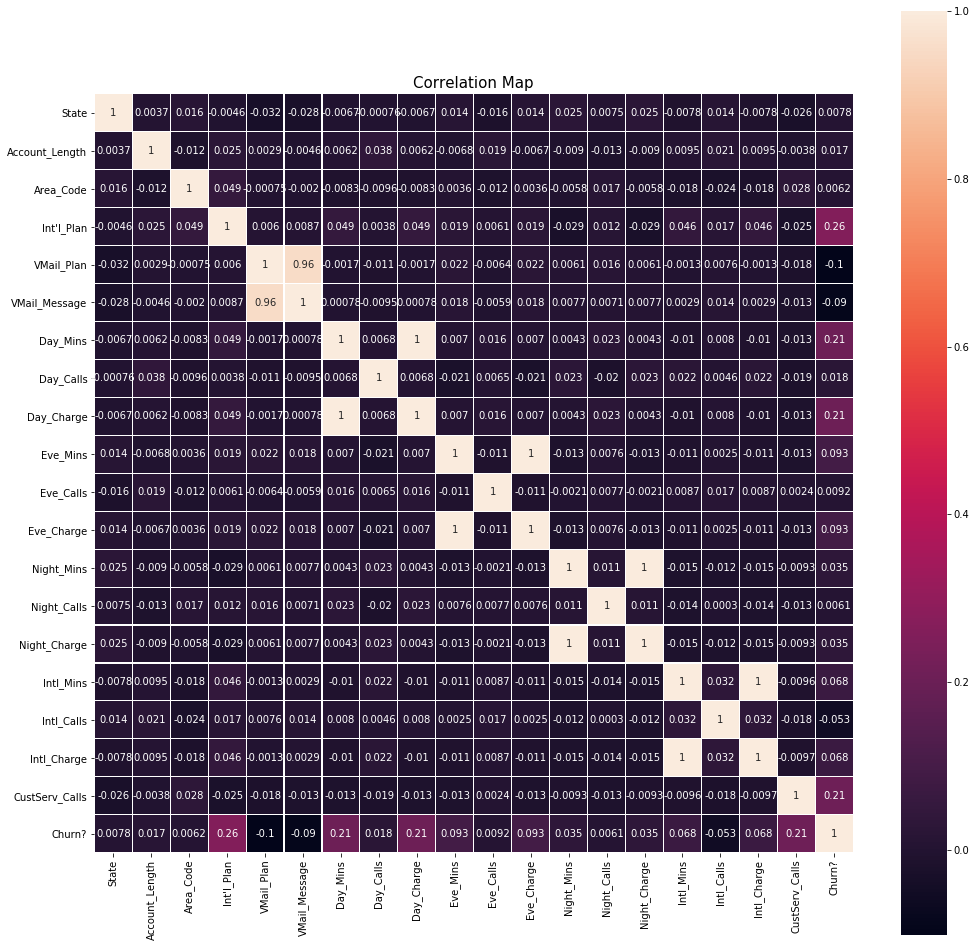

In [18]:
#showing correlation of features of datset
corr = data.corr(method='pearson')
f , ax = plt.subplots(figsize=(17,17))
sns.heatmap(corr,vmax=1.,square=True,annot=True,linewidths=0.1)
plt.title("Correlation Map",fontsize=15)
plt.show()

In [19]:
#Seprating Target And Features
Y=data['Churn?']
X=data.drop(['Churn?'],axis=1)

In [20]:
#spliting data set into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

# Data Preprocessing

In [21]:
#convert state label encoded column to hotencoding  and drop first column to prevent from dummy variable trap
from sklearn.preprocessing import OneHotEncoder
OneHot = OneHotEncoder(categorical_features=[0])
X_train = OneHot.fit_transform(X_train).toarray()
Two =OneHotEncoder(categorical_features=[0])
X_test = OneHot.fit_transform(X_test).toarray()

# performing standard scaling on train and test dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# performing pca on data set
from sklearn.decomposition import PCA
pc = PCA(n_components=69)
X_train =pc.fit_transform(X_train)
X_test =pc.fit_transform(X_test)
explained_variance = pc.explained_variance_ratio_

C:\Users\ankit kumar\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
C:\Users\ankit kumar\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


# LogisticRegression Classifier Model

In [22]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(random_state= 0)
LR_classifier.fit(X_train,y_train)
LR_predict =LR_classifier.predict(X_test)
print('LR_classifier\n',confusion_matrix(y_test,LR_predict))
print('LR_Training Accuarcy',LR_classifier.score(X_train,y_train))
print('LR_Training Accuarcy',LR_classifier.score(X_test,y_test))
Score[0][0]=LR_classifier.score(X_train,y_train)
Score[1][0]=LR_classifier.score(X_test,y_test)

LR_classifier
 [[550  29]
 [ 83   5]]
LR_Training Accuarcy 0.8698424606151538
LR_Training Accuarcy 0.8320839580209896


# LogisticRegression Classifier Model HyperPerameter Tuning


In [23]:
from sklearn.model_selection import GridSearchCV
LR_parameters = [{'C':[1,10,100,1000],
                  'solver' :['newton-cg', 'lbfgs', 'sag', 'saga'],
                  'multi_class' : ['ovr', 'multinomial', 'auto']}]
LR_grid_search = GridSearchCV(estimator=LR_classifier,
                          param_grid=LR_parameters,
                          scoring='accuracy',
                          cv = 10,
                          n_jobs=-1)
LR_grid_search = LR_grid_search.fit(X_train,y_train)
LR_grid_search_pre=LR_grid_search.predict(X_test)
print('LR_GridSearch_Confusion Matrics \n',confusion_matrix(y_test,LR_grid_search_pre))
print('LR_GridSearch_Training_Accuarcy=',LR_grid_search.score(X_train,y_train))
print('LR_GridSearch_Test Accuarcy=',LR_grid_search.score(X_test,y_test))
print('LR_GridSearch__best_params_=',LR_grid_search.best_params_)
print('LR_GridSearch__best_score_=',LR_grid_search.best_score_)
Score[2][0]=LR_grid_search.score(X_train,y_train)
Score[3][0]=LR_grid_search.score(X_test,y_test)

LR_GridSearch_Confusion Matrics 
 [[550  29]
 [ 83   5]]
LR_GridSearch_Training_Accuarcy= 0.8690922730682671
LR_GridSearch_Test Accuarcy= 0.8320839580209896
LR_GridSearch__best_params_= {'C': 10, 'multi_class': 'multinomial', 'solver': 'sag'}
LR_GridSearch__best_score_= 0.8623405851462865


C:\Users\ankit kumar\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


# Support Vector Classifier Model

In [24]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel = 'rbf',random_state=0)
svc_classifier.fit(X_train,y_train)
svc_pre=svc_classifier.predict(X_test)
print('svc_classifier matrix\n',confusion_matrix(y_test,svc_pre))
print('Training Accuarcy',svc_classifier.score(X_train,y_train))
print('Training Accuarcy',svc_classifier.score(X_test,y_test))
Score[0][1]=svc_classifier.score(X_train,y_train)
Score[1][1]=svc_classifier.score(X_test,y_test)

svc_classifier matrix
 [[571   8]
 [ 88   0]]
Training Accuarcy 0.9009752438109527
Training Accuarcy 0.856071964017991


# Support Vector Classifier Model HyperPerameter Tuning

In [25]:
from sklearn.model_selection import GridSearchCV
SVC_parameters = [{'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.5,0.1,0.01,0.001,0.0001]}]
SVC_grid_search = GridSearchCV(estimator=svc_classifier,
                          param_grid=SVC_parameters,
                          scoring='accuracy',
                          cv = 10,
                          n_jobs=-1)
SVC_grid_search = SVC_grid_search.fit(X_train,y_train)
SVC_grid_search_pre=SVC_grid_search.predict(X_test)
print('SVC_GridSearch Confusion Matrics \n',confusion_matrix(y_test,SVC_grid_search_pre))
print('SVC_Grid_Training Accuarcy=',SVC_grid_search.score(X_train,y_train))
print('SVC_GRid_Test Accuarcy=',SVC_grid_search.score(X_test,y_test))
print('SVC_GridSearch_best_params_=',SVC_grid_search.best_params_)
print('SVC_GridSearch_best_score_=',SVC_grid_search.best_score_)
Score[2][1]=SVC_grid_search.score(X_train,y_train)
Score[3][1]=SVC_grid_search.score(X_test,y_test)

SVC_GridSearch Confusion Matrics 
 [[528  51]
 [ 80   8]]
SVC_Grid_Training Accuarcy= 0.9283570892723181
SVC_GRid_Test Accuarcy= 0.8035982008995503
SVC_GridSearch_best_params_= {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
SVC_GridSearch_best_score_= 0.8882220555138785


# KNeighborsClassifier Model

In [26]:
from sklearn.neighbors import KNeighborsClassifier
KN_classifier = KNeighborsClassifier(n_neighbors = 5,metric='minkowski',p=2)
KN_classifier.fit(X_train,y_train)
KN_pre=KN_classifier.predict(X_test)
print('KN_GridSearch Confusion Matrics \n',confusion_matrix(y_test,KN_pre))
print('Training Accuarcy',KN_classifier.score(X_train,y_train))
print('Training Accuarcy',KN_classifier.score(X_test,y_test))
Score[0][2]=KN_classifier.score(X_train,y_train)
Score[1][2]=KN_classifier.score(X_test,y_test)

KN_GridSearch Confusion Matrics 
 [[559  20]
 [ 88   0]]
Training Accuarcy 0.8709677419354839
Training Accuarcy 0.8380809595202399


# KNeighborsClassifier Model HyperPerameter Tuning

In [27]:
KNparameters = [{'n_neighbors':[3,5,11,19],'weights':['uniform','distance'],'metric':['euclidean','manhattan']}]
from sklearn.model_selection import GridSearchCV

KN_grid_search = GridSearchCV(estimator=KN_classifier,
                          param_grid=KNparameters,
                          scoring='accuracy',
                          verbose = 1, 
                          cv = 10,
                          n_jobs=-1)
KN_grid_search = KN_grid_search.fit(X_train,y_train)
KN_grid_search_pre = KN_grid_search.predict(X_test)
print('KN_GridSearch Confusion Matrics \n',confusion_matrix(y_test,KN_grid_search_pre))
print('KN_Grid_Training Accuarcy =',KN_grid_search.score(X_train,y_train))
print('KN_GRid_Test Accuarcy =',KN_grid_search.score(X_test,y_test))
print('KN_GridSearch_best_params_ =',KN_grid_search.best_params_)
print('KN_GridSearch_best_score_ =',KN_grid_search.best_score_)

Score[2][2]=KN_grid_search.score(X_train,y_train)
Score[3][2]=KN_grid_search.score(X_test,y_test)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.9min finished


KN_GridSearch Confusion Matrics 
 [[576   3]
 [ 88   0]]
KN_Grid_Training Accuarcy = 0.8563390847711928
KN_GRid_Test Accuarcy = 0.863568215892054
KN_GridSearch_best_params_ = {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
KN_GridSearch_best_score_ = 0.8533383345836459


# DecisionTreeClassifier Model

In [28]:
from sklearn.tree import DecisionTreeClassifier
DC_classifier = DecisionTreeClassifier()
DC_classifier.fit(X_train,y_train)
DC_pre=DC_classifier.predict(X_test)
print('DC_classifier matrix\n',confusion_matrix(y_test,DC_pre))
print('Training Accuarcy',DC_classifier.score(X_train,y_train))
print('Training Accuarcy',DC_classifier.score(X_test,y_test))
Score[0][3]=DC_classifier.score(X_train,y_train)
Score[1][3]=DC_classifier.score(X_test,y_test)

DC_classifier matrix
 [[465 114]
 [ 67  21]]
Training Accuarcy 1.0
Training Accuarcy 0.7286356821589205


# DecisionTreeClassifier Model HyperPerameter Tuning

In [29]:
DCparameters = [{'criterion':["gini","entropy"],'splitter':['best','random']}]
from sklearn.model_selection import GridSearchCV

DC_grid_search = GridSearchCV(estimator=DC_classifier,
                          param_grid=DCparameters,
                          scoring='accuracy',
                          verbose = 1, 
                          cv = 10,
                          n_jobs=-1)
DC_grid_search = DC_grid_search.fit(X_train,y_train)
DC_grid_search_pre=DC_grid_search.predict(X_test)
print('DC_GridSearch Confusion Matrics \n',confusion_matrix(y_test,DC_grid_search_pre))
print('DC_Grid_Training Accuarcy=',DC_grid_search.score(X_train,y_train))
print('DC_GRid_Test Accuarcy=',DC_grid_search.score(X_test,y_test))
print('DC_GridSearch_best_params_=',DC_grid_search.best_params_)
print('DC_GridSearch_best_score_=',DC_grid_search.best_score_)
Score[2][3]=DC_classifier.score(X_train,y_train)
Score[3][3]=DC_classifier.score(X_test,y_test)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    5.0s finished


DC_GridSearch Confusion Matrics 
 [[472 107]
 [ 78  10]]
DC_Grid_Training Accuarcy= 1.0
DC_GRid_Test Accuarcy= 0.7226386806596702
DC_GridSearch_best_params_= {'criterion': 'entropy', 'splitter': 'best'}
DC_GridSearch_best_score_= 0.8248312078019505


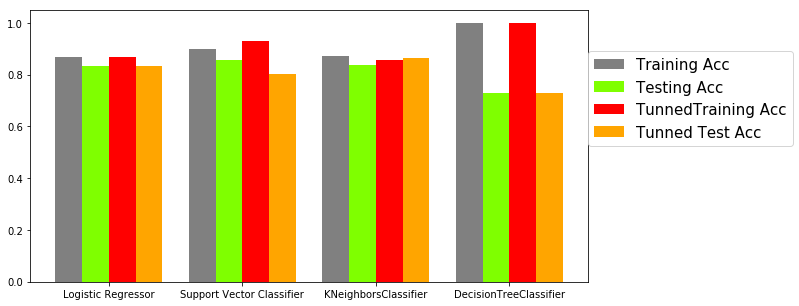

In [30]:
x=np.arange(4)
plt.figure(figsize=(10,5))
plt.bar(x+0.00,Score[0],width=0.20,color='gray',label='Training Acc')
plt.bar(x+0.20,Score[1],width=0.20,color='chartreuse',label='Testing Acc')
plt.bar(x+0.40,Score[2],width=0.20,color='r',label='TunnedTraining Acc')
plt.bar(x+0.60,Score[3],width=0.20,color='orange',label='Tunned Test Acc')
plt.xticks([0.30,1.3,2.3,3.3],['Logistic Regressor','Support Vector Classifier','KNeighborsClassifier','DecisionTreeClassifier'])
plt.legend(fontsize=15,loc=(1.0,0.5))
plt.show()